This notebook plots correlation between parameters of interest (Flanker) between monozygotes 

In [1]:
import glob

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats
import seaborn as sns

from math import log10, floor

pd.options.display.max_rows = 20

# Gets subjects treated with morphologist with relevant columns

In [2]:
participants_file = "/neurospin/dico/data/bv_databases/human/not_labeled/hcp/participants.csv"
participants_unrestricted = pd.read_csv(participants_file)
participants_unrestricted = participants_unrestricted[['Subject', "Gender", "Flanker_AgeAdj", "NEOFAC_A", "NEOFAC_O", "NEOFAC_C", "NEOFAC_N", "NEOFAC_E"]]
participants_unrestricted.head()


,Subject,Gender,Flanker_AgeAdj,NEOFAC_A,NEOFAC_O,NEOFAC_C,NEOFAC_N,NEOFAC_E
0,100004,M,111.01,27.0,15.0,28.0,24.0,25.0
1,100206,M,116.55,29.0,23.0,26.0,21.0,32.0
2,100307,F,101.90,37.0,24.0,35.0,15.0,37.0
3,100408,M,113.51,33.0,29.0,34.0,15.0,33.0
4,100610,M,114.18,31.0,33.0,36.0,7.0,15.0


In [3]:
len(participants_unrestricted)

1206

In [4]:
participants_file = "~/RESTRICTED_jchavas_1_18_2022_3_17_51.csv"
participants = pd.read_csv(participants_file)
len(participants)

1206

In [5]:
participants = participants[['Subject', 'ZygosityGT', 'Family_ID']]
participants.head()

,Subject,ZygosityGT,Family_ID
0,100004,,52259_82122
1,100206,,56037_85858
2,100307,MZ,51488_81352
3,100408,MZ,51730_81594
4,100610,DZ,52813_82634


In [6]:
participants = pd.merge(participants_unrestricted, participants)
participants.head()

,Subject,Gender,Flanker_AgeAdj,NEOFAC_A,NEOFAC_O,NEOFAC_C,NEOFAC_N,NEOFAC_E,ZygosityGT,Family_ID
0,100004,M,111.01,27.0,15.0,28.0,24.0,25.0,,52259_82122
1,100206,M,116.55,29.0,23.0,26.0,21.0,32.0,,56037_85858
2,100307,F,101.90,37.0,24.0,35.0,15.0,37.0,MZ,51488_81352
3,100408,M,113.51,33.0,29.0,34.0,15.0,33.0,MZ,51730_81594
4,100610,M,114.18,31.0,33.0,36.0,7.0,15.0,DZ,52813_82634


In [7]:
participants.loc[(participants['ZygosityGT']== " "), 'ZygosityGT'] = 'NotTwin'  
participants['Subject'] = participants['Subject'].astype('string')


In [8]:
print(participants.dtypes)
participants.head()

Subject           string[python]
Gender                    object
Flanker_AgeAdj           float64
NEOFAC_A                 float64
NEOFAC_O                 float64
NEOFAC_C                 float64
NEOFAC_N                 float64
NEOFAC_E                 float64
ZygosityGT                object
Family_ID                 object
dtype: object


,Subject,Gender,Flanker_AgeAdj,NEOFAC_A,NEOFAC_O,NEOFAC_C,NEOFAC_N,NEOFAC_E,ZygosityGT,Family_ID
0,100004,M,111.01,27.0,15.0,28.0,24.0,25.0,NotTwin,52259_82122
1,100206,M,116.55,29.0,23.0,26.0,21.0,32.0,NotTwin,56037_85858
2,100307,F,101.90,37.0,24.0,35.0,15.0,37.0,MZ,51488_81352
3,100408,M,113.51,33.0,29.0,34.0,15.0,33.0,MZ,51730_81594
4,100610,M,114.18,31.0,33.0,36.0,7.0,15.0,DZ,52813_82634


In [9]:
treated_subjects = glob.glob("/neurospin/dico/data/bv_databases/human/not_labeled/hcp/hcp/*[!.minf]")
treated_subjects = [x.split('/')[-1] for x in treated_subjects]
treated_subjects = [x for x in treated_subjects if 'database' not in x]
print(treated_subjects[:5])
len(treated_subjects)

['210112', '579665', '922854', '517239', '329440']


1114

In [10]:
participants.dtypes

Subject           string[python]
Gender                    object
Flanker_AgeAdj           float64
NEOFAC_A                 float64
NEOFAC_O                 float64
NEOFAC_C                 float64
NEOFAC_N                 float64
NEOFAC_E                 float64
ZygosityGT                object
Family_ID                 object
dtype: object

In [11]:
participants = participants[participants['Subject'].isin(treated_subjects)]

In [12]:
len(participants)

1113

In [13]:
set(treated_subjects) - set(participants['Subject'])

{'142626'}

# Separates according to gender and zygocity

In [14]:
set(participants['ZygosityGT'].tolist())

{'DZ', 'MZ', 'NotTwin'}

In [16]:
def create_subset(df, gender, zygosityGT):
    """Creates a subset of participants.
    
    The subset corresponds to the values of column gender and zygosityGT"""
    if gender:
        subset = df[(df['Gender']==gender) & (df['ZygosityGT']==zygosityGT)]
    else:
        subset = df[df['ZygosityGT']==zygosityGT]
    subset = subset.groupby(by='Family_ID', as_index=False).apply(lambda x: x)

    return subset

In [47]:
M_MZ = create_subset(participants, 'M', 'MZ')
F_MZ = create_subset(participants, 'F', 'MZ')
M_DZ = create_subset(participants, 'M', 'DZ')
F_DZ = create_subset(participants, 'F', 'DZ')
M_NotTwin = create_subset(participants, 'M', 'NotTwin')
F_NotTwin = create_subset(participants, 'F', 'NotTwin')
NotTwin = create_subset(participants, None, 'NotTwin')
M_MZ.head()

Subject Gender  Flanker_AgeAdj  NEOFAC_A  NEOFAC_O  NEOFAC_C  NEOFAC_N  \
0 632   233326      M          114.95      33.0      22.0      40.0      19.0   
  719   352738      M          120.15      44.0      31.0      38.0      13.0   
1 253   146432      M          108.16      37.0      33.0      40.0      13.0   
  1077  818859      M           96.24      31.0      28.0      33.0      20.0   
2 155   128935      M          108.56      26.0      28.0      34.0      12.0   

        NEOFAC_E ZygosityGT    Family_ID  
0 632       34.0         MZ  51698_81562  
  719       43.0         MZ  51698_81562  
1 253       32.0         MZ  51702_81566  
  1077      32.0         MZ  51702_81566  
2 155       31.0         MZ  51707_81571

In [48]:
NotTwin

Subject Gender  Flanker_AgeAdj  NEOFAC_A  NEOFAC_O  NEOFAC_C  \
0   652   257946      F          105.31      29.0      28.0      38.0   
    1182  962058      M          106.07      38.0      24.0      40.0   
1   882   571144      M          114.42      26.0      24.0      36.0   
2   609   213017      M          105.07      35.0      30.0      35.0   
    828   517239      M          101.90      28.0      33.0      33.0   
...          ...    ...             ...       ...       ...       ...   
384 928   618952      M           79.00      44.0      42.0      33.0   
385 951   650746      M          105.01      31.0      35.0      37.0   
386 827   516742      M           95.15      30.0      26.0      45.0   
387 80    114823      F          104.44      29.0      40.0      30.0   
388 543   200917      F           83.96      35.0      34.0      27.0   

          NEOFAC_N  NEOFAC_E ZygosityGT    Family_ID  
0   652       20.0      31.0    NotTwin  50263_80216  
    1182      14.0      31.0    NotTwin  50263_80216  
1   882       25.0      21.0    NotTwin  50371_80310  
2   609       12.0      34.0    NotTwin  50373_80312  
    828       26.0      27.0    NotTwin  50373_80312  
...            ...       ...        ...          ...  
384 928        8.0      37.0    NotTwin  56202_86021  
385 951       21.0      38.0    NotTwin  99987_99988  
386 827        3.0      36.0    NotTwin  99989_99990  
387 80        21.0      33.0    NotTwin  99996_99997  
388 543       13.0      33.0    NotTwin  99998_99999  

[657 rows x 10 columns]

In [49]:
F_MZ[F_MZ.Family_ID=="51106_80975"]

,,Subject,Gender,Flanker_AgeAdj,NEOFAC_A,NEOFAC_O,NEOFAC_C,NEOFAC_N,NEOFAC_E,ZygosityGT,Family_ID
0,130,123723,F,99.98,25.0,22.0,31.0,34.0,34.0,MZ,51106_80975


In [50]:
M_NotTwin = M_NotTwin.dropna()

In [51]:
F_NotTwin = F_NotTwin.dropna()

In [63]:
NotTwin = NotTwin.dropna()

In [64]:
len(NotTwin)

650

# Only keeps zygotes whose family_ID is present twice

In [52]:
def keep_occurence_two(df, col = "Family_ID"):
    occurences = df[col].value_counts().to_dict() # Creates  dictionary of number of occurences
    df2 = df.copy(deep=True)
    df2["occurences"] = df2[col].apply(lambda x: occurences[x])
    df2 = df2[df2["occurences"] == 2]
    # print(df2.head())
    return df2


In [85]:
def keep_occurence_two_if_different_gender(df, col = "Family_ID"):
    occurences = df[col].value_counts().to_dict() # Creates  dictionary of number of occurences
    df2 = df.copy(deep=True)
    df2["occurences"] = df2[col].apply(lambda x: occurences[x])
    df2 = df2[df2["occurences"] == 2]
    df2["family_gender"] = df2[col] + '_' + df2["Gender"]
    occurences_family_gender = df2["family_gender"].value_counts().to_dict()
    df2["occurences_family_gender"] = df2["family_gender"].apply(lambda x: occurences_family_gender[x])
    df2 = df2[df2["occurences_family_gender"] == 1]
    print(df2.head())
    return df2

In [86]:
NotTwin2 = keep_occurence_two_if_different_gender(NotTwin)
# print(len(NotTwin2), len(M_NotTwin2), len(F_NotTwin2))

        Subject Gender  Flanker_AgeAdj  NEOFAC_A  NEOFAC_O  NEOFAC_C  \
0  652   257946      F          105.31      29.0      28.0      38.0   
   1182  962058      M          106.07      38.0      24.0      40.0   
12 104   118932      M          102.39      33.0      34.0      29.0   
   553   203721      F           98.00      40.0      35.0      34.0   
34 683   304020      M          114.95      34.0      26.0      37.0   

         NEOFAC_N  NEOFAC_E ZygosityGT    Family_ID  occurences  \
0  652       20.0      31.0    NotTwin  50263_80216           2   
   1182      14.0      31.0    NotTwin  50263_80216           2   
12 104       25.0      21.0    NotTwin  51295_81161           2   
   553       18.0      36.0    NotTwin  51295_81161           2   
34 683        7.0      29.0    NotTwin  51355_81220           2   

         family_gender  occurences_family_gender  
0  652   50263_80216_F                         1  
   1182  50263_80216_M                         1  
12 104   51

In [53]:
F_MZ2 = keep_occurence_two(F_MZ)

In [54]:
M_MZ2 = keep_occurence_two(M_MZ)

In [55]:
F_DZ2 = keep_occurence_two(F_DZ)

In [56]:
M_DZ2 = keep_occurence_two(M_DZ)

In [57]:
M_NotTwin2 = keep_occurence_two(M_NotTwin)

In [58]:
F_NotTwin2 = keep_occurence_two(F_NotTwin)

In [59]:
M_NotTwin2.isnull().values.any()

False

In [77]:
F_NotTwin2

Subject Gender  Flanker_AgeAdj  NEOFAC_A  NEOFAC_O  NEOFAC_C  \
1   610   213421      F          103.63      37.0      32.0      31.0   
    635   237334      F           95.98      33.0      38.0      32.0   
5   644   250427      F          105.98      44.0      27.0      30.0   
    1120  877168      F          107.05      46.0      36.0      41.0   
6   285   151627      F          113.84      32.0      26.0      44.0   
...          ...    ...             ...       ...       ...       ...   
238 1200  992673      F           84.13      43.0      30.0      37.0   
240 661   280941      F          106.83      33.0      32.0      36.0   
    810   481042      F           82.48      32.0      24.0      36.0   
241 290   152427      F          100.34      35.0      28.0      31.0   
    1088  828862      F           92.69      44.0      19.0      40.0   

          NEOFAC_N  NEOFAC_E ZygosityGT    Family_ID  occurences  
1   610       22.0      27.0    NotTwin  50532_80448           2  
    635       18.0      25.0    NotTwin  50532_80448           2  
5   644       15.0      40.0    NotTwin  51287_81153           2  
    1120      13.0      41.0    NotTwin  51287_81153           2  
6   285       16.0      33.0    NotTwin  51289_81155           2  
...            ...       ...        ...          ...         ...  
238 1200       7.0      25.0    NotTwin  56143_85963           2  
240 661       19.0      23.0    NotTwin  56166_85985           2  
    810       18.0      27.0    NotTwin  56166_85985           2  
241 290       27.0      20.0    NotTwin  56171_85990           2  
    1088      14.0      25.0    NotTwin  56171_85990           2  

[100 rows x 11 columns]

In [88]:
NotTwin2

Subject Gender  Flanker_AgeAdj  NEOFAC_A  NEOFAC_O  NEOFAC_C  \
0   652   257946      F          105.31      29.0      28.0      38.0   
    1182  962058      M          106.07      38.0      24.0      40.0   
12  104   118932      M          102.39      33.0      34.0      29.0   
    553   203721      F           98.00      40.0      35.0      34.0   
34  683   304020      M          114.95      34.0      26.0      37.0   
...          ...    ...             ...       ...       ...       ...   
360 511   195950      M          111.49      38.0      20.0      43.0   
370 15    102513      M           72.81      26.0      39.0      27.0   
    1189  972566      F          109.25      19.0      24.0      37.0   
379 151   128026      F           97.24      34.0      22.0      33.0   
    911   597869      M           92.39      27.0      23.0      35.0   

          NEOFAC_N  NEOFAC_E ZygosityGT          Family_ID  occurences  \
0   652       20.0      31.0    NotTwin        50263_80216           2   
    1182      14.0      31.0    NotTwin        50263_80216           2   
12  104       25.0      21.0    NotTwin        51295_81161           2   
    553       18.0      36.0    NotTwin        51295_81161           2   
34  683        7.0      29.0    NotTwin        51355_81220           2   
...            ...       ...        ...                ...         ...   
360 511       14.0      37.0    NotTwin  56016_85837_99974           2   
370 15        12.0      27.0    NotTwin        56077_85897           2   
    1189       8.0      21.0    NotTwin        56077_85897           2   
379 151       22.0      29.0    NotTwin        56150_85970           2   
    911       21.0      30.0    NotTwin        56150_85970           2   

                family_gender  occurences_family_gender  
0   652         50263_80216_F                         1  
    1182        50263_80216_M                         1  
12  104         51295_81161_M                         1  
    553         51295_81161_F                         1  
34  683         51355_81220_M                         1  
...                       ...                       ...  
360 511   56016_85837_99974_M                         1  
370 15          56077_85897_M                         1  
    1189        56077_85897_F                         1  
379 151         56150_85970_F                         1  
    911         56150_85970_M                         1  

[118 rows x 13 columns]

# Plots Flanker between monozygotes and dizygotes

In [92]:
def plot_correlation(df, column_name):
    values = df[column_name].values
    first = values[np.arange(0,len(values),2)]
    second = values[np.arange(1,len(values),2)]
    print(scipy.stats.pearsonr(first, second))
    # plt.scatter(first, second)
    dfplot = pd.DataFrame(np.array([first, second]).T, columns=["x", "y"])
    sns.lmplot(x="x", y="y", data=dfplot)

PearsonRResult(statistic=0.4485634367948502, pvalue=0.0004661626261346082)


/home/jc225751/Runs/61_classifier_regresser/Program/venv_natif/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


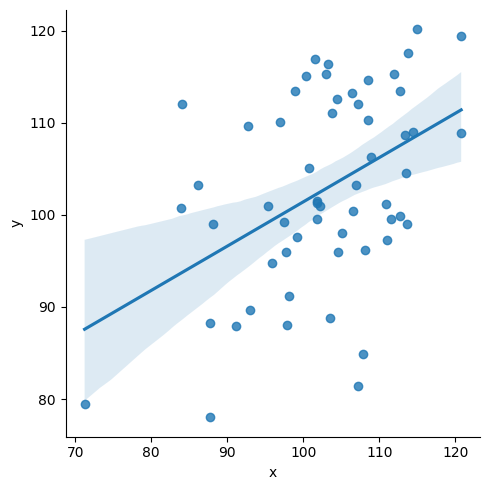

In [93]:
plot_correlation(M_MZ2, "Flanker_AgeAdj")

In [94]:
def round_to_1(x):
    return round(x, -int(floor(log10(abs(x)))))

In [103]:
def plot_regplot(df, column_name, ax=ax):
    values = df[column_name].values
    first = values[np.arange(0,len(values),2)]
    second = values[np.arange(1,len(values),2)]
    test = scipy.stats.pearsonr(first, second)
    # print(test.statistic)
    # print(test.pvalue)
    # call regplot on each axes
    sns.regplot(x=first, y=second, ax=ax)
    ax.text(0.2,0.9,f"p={round_to_1(test.pvalue)}", horizontalalignment='center', verticalalignment='center', transform=ax.transAxes) 

In [99]:
M_MZ2.shape

(114, 11)

0.4485634367948502
0.0004661626261346082


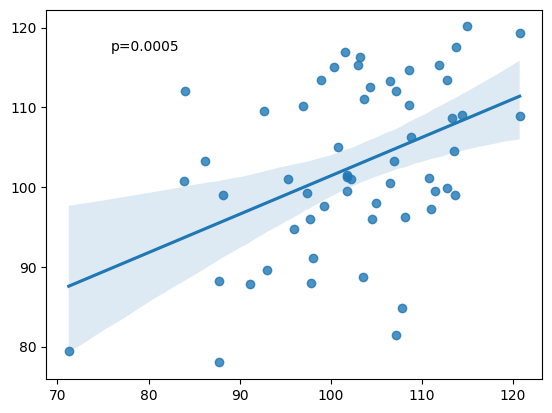

In [100]:
fig, ax = plt.subplots(ncols=1)
plot_regplot(M_MZ2, "Flanker_AgeAdj", ax)

In [115]:
def plot_all_correlations(column_name):
    fig, ax = plt.subplot_mosaic(
        [["MM", "MD", "MT", "Nothing"],
         ["MM", "MD", "MT", "MFT"],
         ["FM", "FD", "FT", "MFT"],
         ["FM", "FD", "FT", "Nothing2"]],
         figsize=(12, 8))
    fig.suptitle(column_name)
    plot_regplot(M_MZ2, column_name, ax["MM"])
    plot_regplot(F_MZ2, column_name, ax["FM"])
    plot_regplot(M_DZ2, column_name, ax["MD"])
    plot_regplot(F_DZ2, column_name, ax["FD"])
    plot_regplot(M_NotTwin2, column_name, ax["MT"])
    plot_regplot(F_NotTwin2, column_name, ax["FT"])
    plot_regplot(NotTwin2, column_name, ax["MFT"])
    ax["Nothing"].axis('off')
    ax["Nothing2"].axis('off')
    ax["MM"].set_title('Monozygote')
    ax["MD"].set_title('Dizygote')
    ax["MT"].set_title('Not Twin')
    ax["MFT"].set_title('Not Twin (M/F)')
    ax["MM"].set_ylabel('Male', rotation=0, fontsize=14, labelpad=25.0)
    ax["FM"].set_ylabel('Female', rotation=0, fontsize=14, labelpad=25.0)


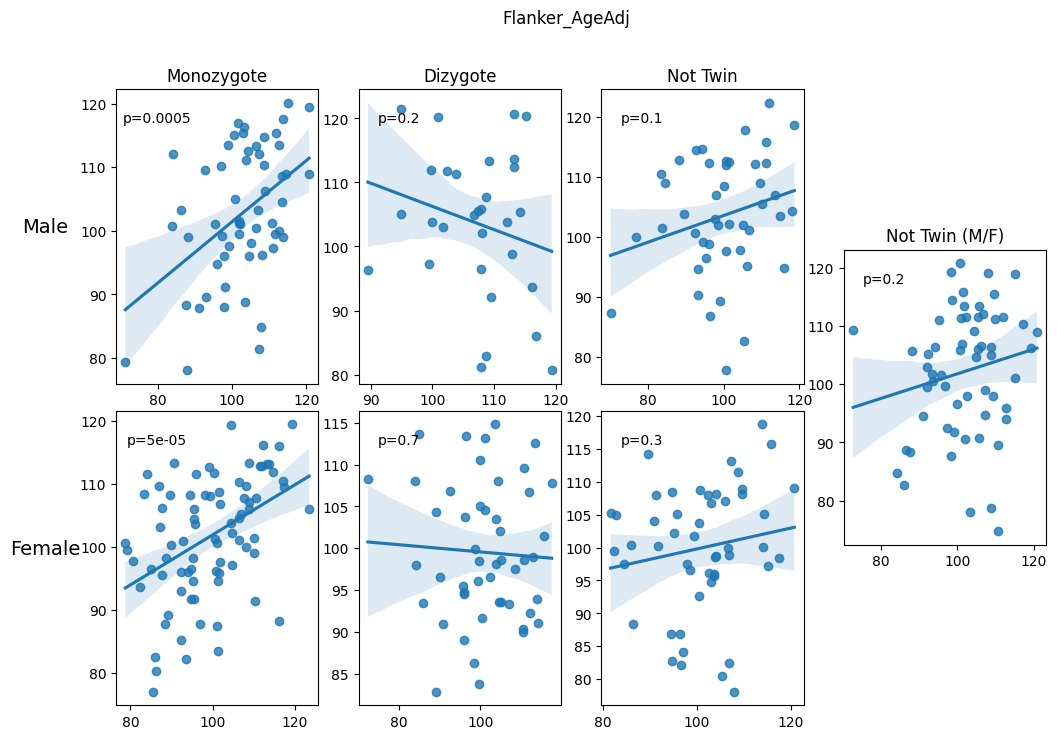

In [116]:
plot_all_correlations("Flanker_AgeAdj")

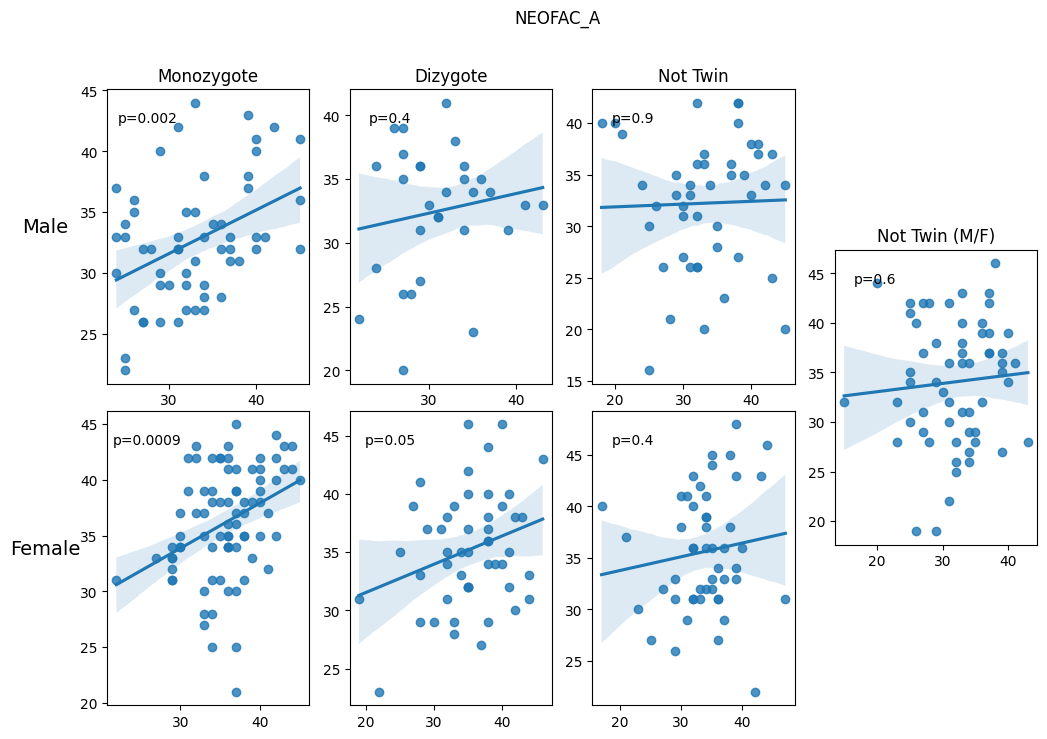

In [118]:
plot_all_correlations("NEOFAC_A")

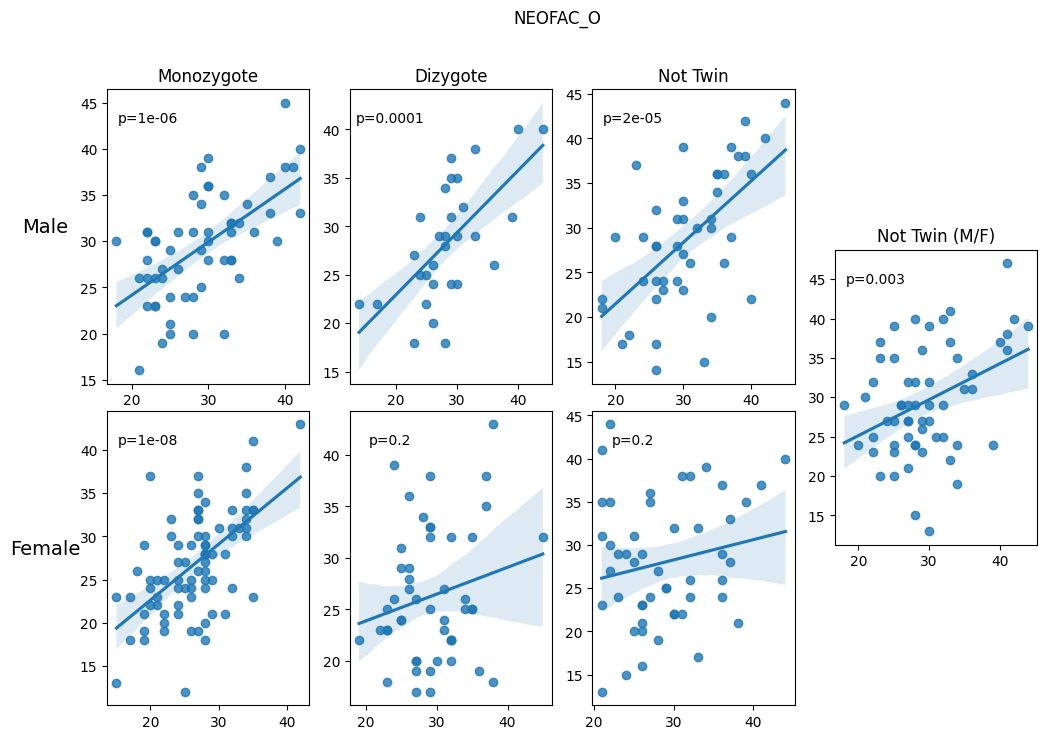

In [119]:
plot_all_correlations("NEOFAC_O")

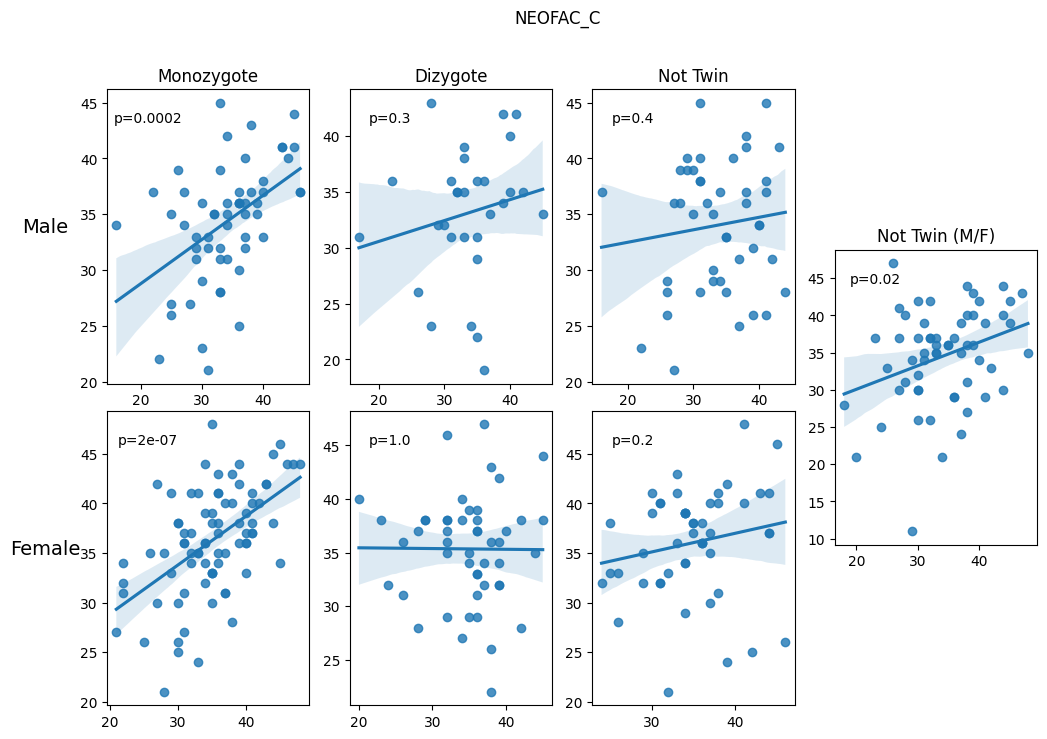

In [120]:
plot_all_correlations("NEOFAC_C")

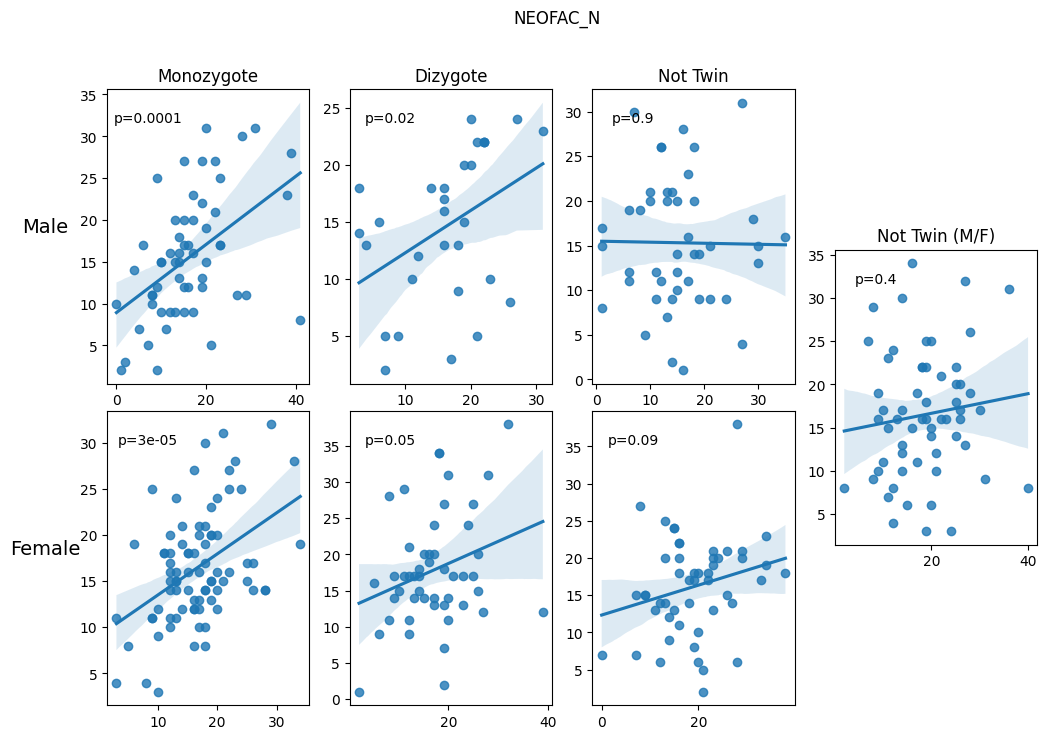

In [121]:
plot_all_correlations("NEOFAC_N")

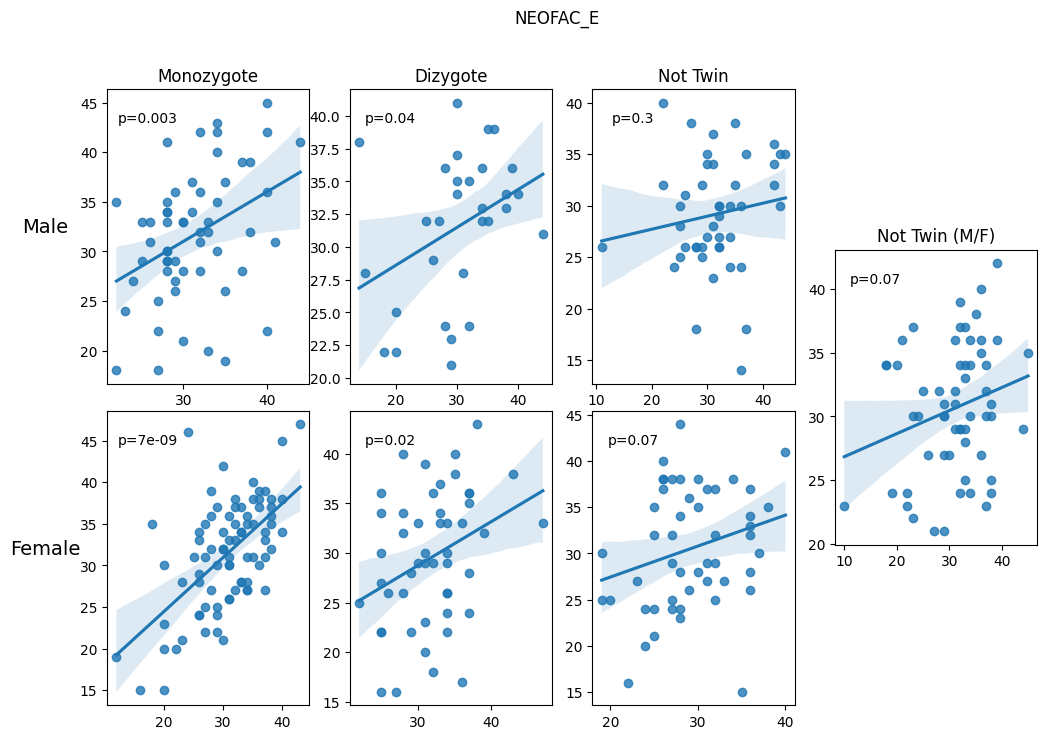

In [122]:
plot_all_correlations("NEOFAC_E")